In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [13]:
pd.DataFrame(inspector.get_columns('measurement'))

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0


In [14]:
pd.DataFrame(inspector.get_columns('station'))

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [15]:
measurement_table = pd.read_sql("SELECT * FROM measurement", engine.connect())
measurement_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
id         19550 non-null int64
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [16]:
station_table = pd.read_sql("SELECT * FROM station", engine.connect())
station_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
id           9 non-null int64
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


# Exploratory Climate Analysis

In [17]:
measurement_table.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [18]:
print([i for i in session.query(Measurement.prcp, Measurement.date).filter(Measurement.date.like('2016%')).all()])

[(0.0, '2016-01-01'), (0.0, '2016-01-02'), (0.0, '2016-01-03'), (0.0, '2016-01-04'), (0.0, '2016-01-05'), (0.0, '2016-01-06'), (0.18, '2016-01-07'), (0.01, '2016-01-08'), (0.03, '2016-01-09'), (0.01, '2016-01-10'), (0.0, '2016-01-11'), (0.0, '2016-01-12'), (0.0, '2016-01-13'), (0.0, '2016-01-14'), (0.0, '2016-01-15'), (0.01, '2016-01-16'), (0.0, '2016-01-17'), (0.0, '2016-01-18'), (0.0, '2016-01-19'), (0.0, '2016-01-20'), (0.0, '2016-01-21'), (0.0, '2016-01-22'), (0.0, '2016-01-23'), (0.0, '2016-01-24'), (0.04, '2016-01-25'), (0.16, '2016-01-26'), (0.01, '2016-01-27'), (0.0, '2016-01-28'), (0.0, '2016-01-29'), (0.0, '2016-01-30'), (0.0, '2016-01-31'), (0.0, '2016-02-01'), (0.06, '2016-02-02'), (0.0, '2016-02-03'), (0.0, '2016-02-04'), (0.0, '2016-02-05'), (0.0, '2016-02-06'), (0.02, '2016-02-07'), (0.01, '2016-02-08'), (0.0, '2016-02-09'), (0.0, '2016-02-10'), (0.0, '2016-02-11'), (0.02, '2016-02-12'), (0.0, '2016-02-13'), (0.0, '2016-02-14'), (0.0, '2016-02-15'), (0.02, '2016-02-16'),

In [19]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()[0][0]

In [20]:
str(dt.date.fromisoformat(last_date) - dt.timedelta(days=365))

'2016-08-23'

In [21]:
print(type(last_date))

<class 'str'>


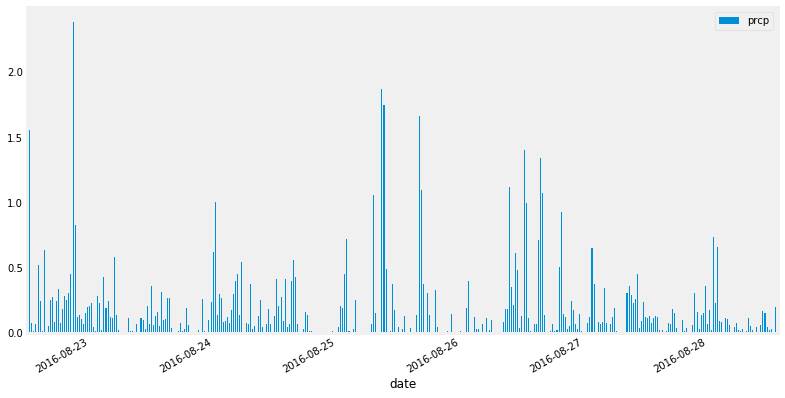

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement).\
    order_by(Measurement.date.desc()).\
    limit(365).all()

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).\
    first()[0]

yr_later_date = str(dt.date.fromisoformat(last_date) - dt.timedelta(days=366))

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.prcp, Measurement.date]
prcp_1yr = session.query(*sel).\
    filter(Measurement.date > yr_later_date).\
    filter(Measurement.date < last_date).\
    all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_1yr).groupby(['date']).mean()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(kind='bar',
             figsize=(12,6),
             grid=False)

plt.xticks(np.arange(30, 366, 60),
           labels=prcp_df.index,
           horizontalalignment='right',
           rotation=30)

plt.show()

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
